In [86]:
import numpy as np
import pandas as pd
from utils import *

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt

To what extent does model performance depend on the data categories? E.g. Observations for homeless vs poor-families, etc. (5 marks)


In [5]:
robert_test = np.load('predictions/preds_bert_cased_test.npy')
bert_uncased_test = np.load('predictions/preds_bert_uncased_test.npy')
bert_cased_test = np.load('predictions/preds_bert_cased_test.npy')

true_test = np.load('predictions/true_test.npy')

In [6]:
test_majority_vote_ensemble = np.int8((robert_test + bert_uncased_test + bert_cased_test) > 1)

In [56]:
_, _, test_set = load_train_and_val()

In [99]:
word = 'homeless'

dict = {}

for word in np.unique(test_set['keyword']):
    idx = (test_set['keyword'] == word).to_numpy()
    f1 = f1_score(y_true = true_test[idx], y_pred = test_majority_vote_ensemble[idx])
    dict[word] = f1
    print(f'Keyword: {word} \t F1: {f1}')

dict = {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}

Keyword: disabled 	 F1: 0.46153846153846156
Keyword: homeless 	 F1: 0.5357142857142857
Keyword: hopeless 	 F1: 0.47619047619047616
Keyword: immigrant 	 F1: 0.3076923076923077
Keyword: in-need 	 F1: 0.6835443037974683
Keyword: migrant 	 F1: 0.4444444444444444
Keyword: poor-families 	 F1: 0.5074626865671642
Keyword: refugee 	 F1: 0.3076923076923077
Keyword: vulnerable 	 F1: 0.5333333333333333
Keyword: women 	 F1: 0.37037037037037035


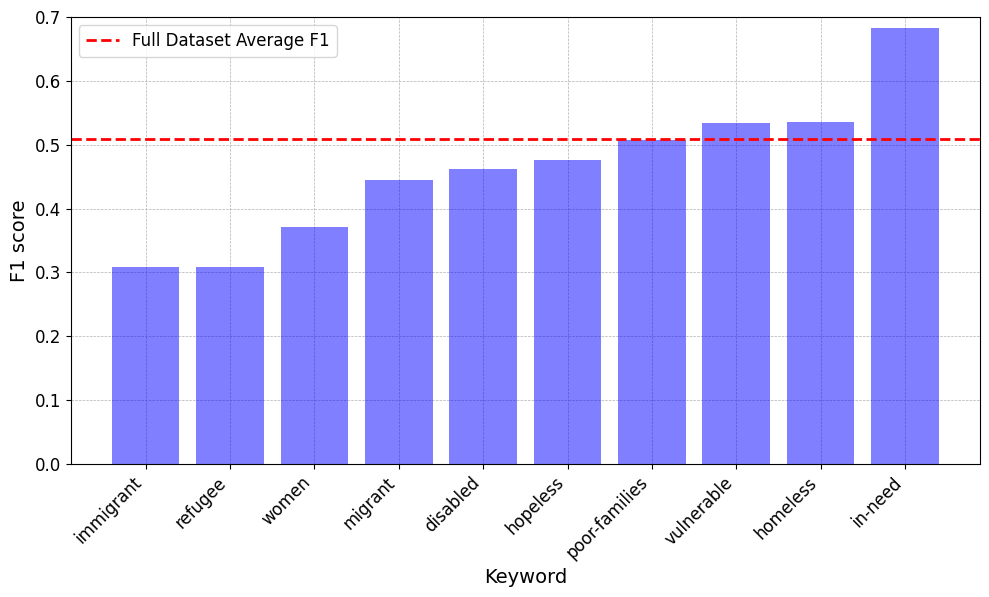

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size for better readability

keywords = list(dict.keys())
values = list(dict.values())

ax.axhline(
    f1_score(true_test, test_majority_vote_ensemble), 
    color='red', linestyle='--', linewidth=2, label='Full Dataset Average F1')

ax.bar(keywords, values, color='blue', alpha = 0.5)  # Added color for a nicer look

plt.xticks(rotation=45, ha="right", fontsize=12)  # Increased font size for x-ticks
plt.yticks(fontsize=12)  # Increased font size for y-ticks
plt.xlabel('Keyword', fontsize=14)  # Increased font size for x-label
plt.ylabel('F1 score', fontsize=14)  # Increased font size for y-label

ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Added grid lines for better readability
ax.set_axisbelow(True)  # Ensure grid lines are behind the bars

plt.legend(fontsize=12)
plt.tight_layout()
plt.ylim(0, 0.7)
plt.savefig('figs/f1_by_keyword.png')
plt.show()